# Sales Analysis

## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Importing Dataset

#### Merging the 12 months of sales data into a single CSV file

In [4]:
files = [file for file in os.listdir("C:/Users/Sandeep Vashisth/Pictures/Data Science Certificates/Data Science Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

#creating an empty dataframe to store the merged sales data
all_months_data = pd.DataFrame()

#Appending the data into all_months_data variable
for file in files:
    df = pd.read_csv("C:/Users/Sandeep Vashisth/Pictures/Data Science Certificates/Data Science Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv", index = False)

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Wrangling

### Identifying missing values

In [6]:
missing_data = all_data.isnull()
missing_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [7]:
#Figuring out the number of missing values in each column

for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

Order ID
False    186305
True        545
Name: count, dtype: int64

Product
False    186305
True        545
Name: count, dtype: int64

Quantity Ordered
False    186305
True        545
Name: count, dtype: int64

Price Each
False    186305
True        545
Name: count, dtype: int64

Order Date
False    186305
True        545
Name: count, dtype: int64

Purchase Address
False    186305
True        545
Name: count, dtype: int64



### Dropping missing values

In [8]:
all_data.dropna(axis=0,inplace=True)
# all_data.head()

all_data.reset_index(drop=True,inplace= True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
#Getting rid of the index repeating rows due to merged data

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Augment data with additional columns

#### Add column 'month'

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a column 'Sales'

In [11]:
#Converting columns to correct datatype

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [12]:
#creating a new column 'sales'

all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a column 'City' and 'State'

In [13]:
#using apply function, where x is the cell content and for each of the cell content we need to split data by commas and grab the first index.

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[2])
all_data['State'] = all_data['State'].apply(lambda x: x.split(" ")[1])

all_data["City"] = all_data[["City", "State"]].apply(lambda x: " ".join(x), axis =1)

all_data = all_data.drop(columns='State')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [14]:
all_data['City'].unique()

array([' Dallas TX', ' Boston MA', ' Los Angeles CA', ' San Francisco CA',
       ' Seattle WA', ' Atlanta GA', ' New York City NY', ' Portland OR',
       ' Austin TX', ' Portland ME'], dtype=object)

In [15]:
#Changing datatype of Order date column

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

C:\Users\Sandeep Vashisth\AppData\Local\Temp\ipykernel_13584\4275054237.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Adding a column 'Hour'

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


## Exploratory Data Analysis

### Task 1: Which month has the most number of sales?

In [47]:
monthly_sales = all_data[['Month','Sales']]
monthly_sales = monthly_sales.groupby(['Month']).sum()
monthly_sales

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


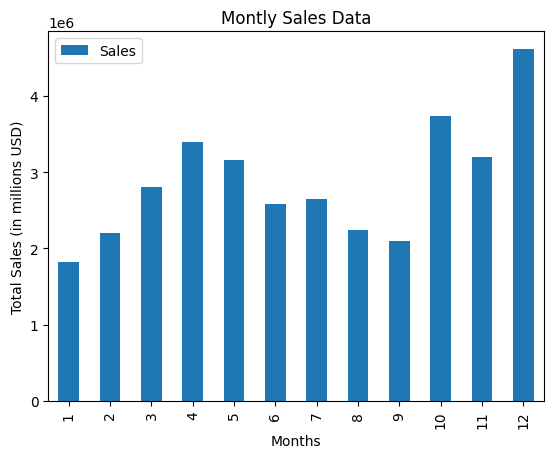

In [55]:

monthly_sales.plot(kind='bar')

plt.xlabel('Months')
plt.ylabel('Total Sales (in millions USD)')
plt.title('Montly Sales Data')
plt.show()

We observed that in the United States, 'December' experienced the most number sales and 'January' has the least number of sales.
The major reason is obviously it's a Chritmas month and New Years Eve so citizens tend to spend a lot in comparison to other months.


### Task 2: Which city has the most number of sales?

In [62]:
city_sales = all_data[['City','Sales']]
city_sales = city_sales.groupby(['City']).sum()
city_sales

,Sales
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


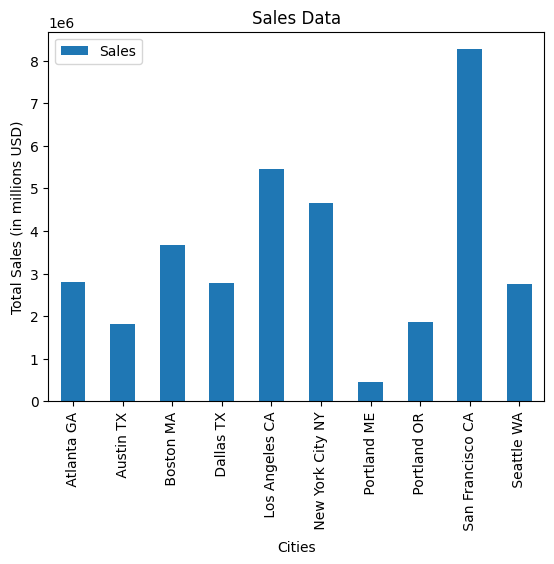

In [66]:
city_sales.plot(kind='bar')

plt.xlabel('Cities')
plt.ylabel('Total Sales (in millions USD)')
plt.title('Sales Data')
plt.show()

San Francisco CA has the most number of sales in year 2019.

### Task 3: What is the most selling product across country?

In [67]:
product_sales = all_data[['Product','Quantity Ordered']]
product_sales = product_sales.groupby(['Product']).sum()
product_sales

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


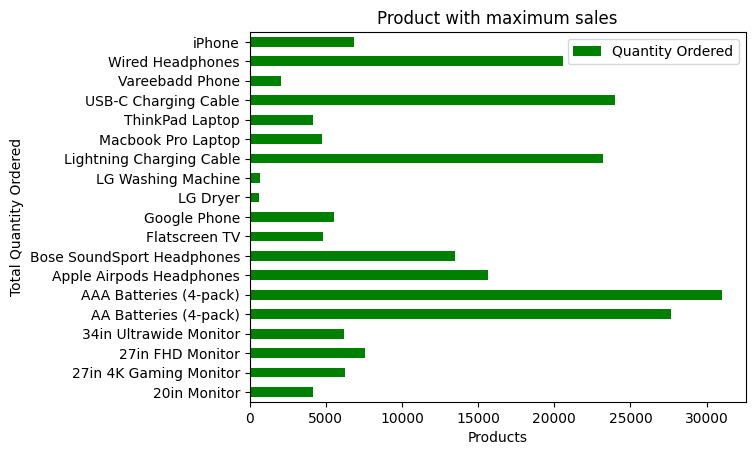

In [73]:
product_sales.plot(kind='barh',color = 'green')

plt.xlabel('Products')
plt.ylabel('Total Quantity Ordered')
plt.title('Product with maximum sales')
plt.show()

The most selling products across the country are 'AAA' and 'AA' battries and the least selling products are Dryer and Washing Machine.

In [113]:
product_price = all_data[['Product', 'Price Each']]
product_price = all_data.groupby('Product')['Price Each'].mean()
product_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Sandeep Vashisth\AppData\Local\Temp\ipykernel_13584\2212823581.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size = 8)


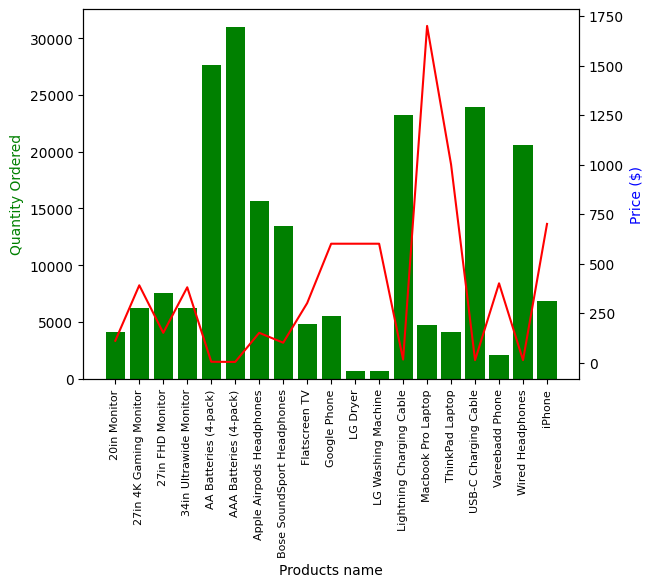

In [123]:

product_group = all_data.groupby('Product')
products = [product for product, df in product_group]

quantity_ordered = product_group['Quantity Ordered'].sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = 'g')
ax2.plot(products, product_price, 'r')

ax1.set_xlabel('Products name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size = 8)

plt.show()

We found out that due to low price of AA and AAA batteries, the sales were high and due to high price of Dryer and Washing machne, the sales were the lowest.

### Task 4: At what time of the day majority of the orders gets placed?

In [81]:
day_sales = all_data[['Order ID','Hour']]
day_sales = day_sales.groupby(['Hour']).count()
day_sales

,Order ID
Hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


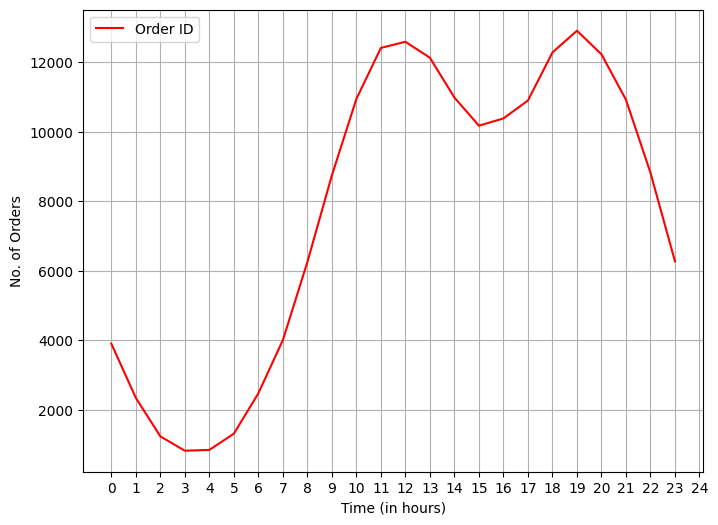

In [98]:
day_sales.plot(kind = 'line',ls = 'solid', color = 'r',figsize = (8,6))

plt.xlabel('Time (in hours)')
plt.ylabel('No. of Orders')
plt.xticks(np.arange(0,25))
plt.grid()
plt.show()

We observed that the maximum flow of the users placing orders is around 11 a.m and at 7 p.m .

## Conclusion

San Franciso has the most number of sales as it is country's one of the most cosmopoliton cities as well as financial centre of Western US.

In December month, people tend to buy more as it is a festive month and new year's eve as well.

Majority of the orders are placed around 11 am and 7 pm , so companies can advertise their products and allure them with some offers as well just before 11 am and 7 pm .

Products with low price tend to get sold more as compared to expensive products.